<a href="https://colab.research.google.com/github/giociudadano/Deep-Learning-Philippine-Rice-Diseases/blob/main/98_7_Accuracy_Classification_of_13_Philippine_Rice_Plant_(Oryza_sativa)_Diseases_Using_Computer_Vision_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>98.7% Accuracy Classification of 13 Philippine Rice Plant (<i>Oryza sativa</i>) Diseases Using Computer Vision and Deep Learning</b></h1>

In [ ]:
# Installs Drive from Google Colab. Drive is a custom module that allows us to interact with Cloud Storage.
# Mounts the drive to this document.

from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
!pip install timm
import timm
from fastai.vision.all import *
from pathlib import Path

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.0 MB/s eta 0:00:00


In [ ]:
path = Path('/content/drive/MyDrive/Dataset')

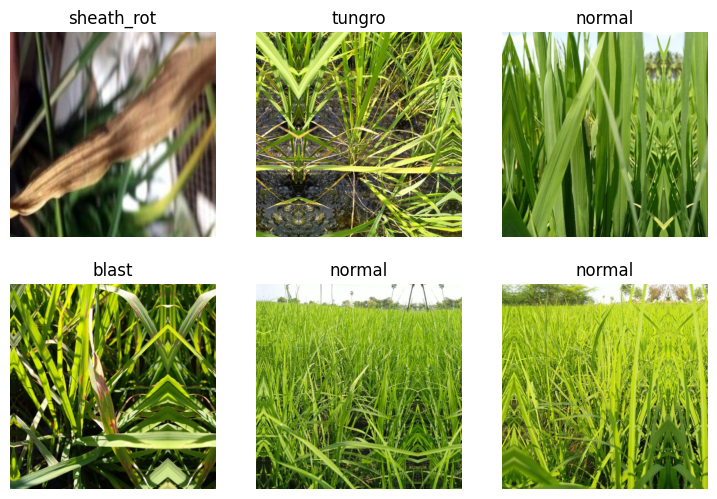

In [ ]:
dls = ImageDataLoaders.from_folder(path, train = "train", valid = "test", seed=42,
    item_tfms=Resize(480, method=ResizeMethod.Pad, pad_mode=PadMode.Reflection))
dls.show_batch(max_n=6)

In [ ]:
arch = 'convnext_small_in22k'

In [ ]:
def train(arch, item, batch, epochs):
    dls = ImageDataLoaders.from_folder(path, train="train", valid="test", seed=42, item_tfms=item, batch_tfms=batch)
    learn = vision_learner(dls, arch, metrics=error_rate).to_fp16()
    learn.fine_tune(epochs, 0.01)
    return learn


learn = train(arch, epochs=12,
              item=Resize(480, method=ResizeMethod.Pad, pad_mode=PadMode.Reflection),
              batch=aug_transforms(size=(256,192), min_scale=0.75))

/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_small_in22k to current convnext_small.fb_in22k.
  model = create_fn(


model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.355148,0.744392,0.225890,24:42


epoch,train_loss,valid_loss,error_rate,time
0,0.536429,0.282670,0.091262,02:02
1,0.391082,0.256612,0.078964,02:01
2,0.286595,0.307365,0.084790,02:00
3,0.260368,0.216102,0.052427,02:04
4,0.175135,0.183447,0.039482,02:02
5,0.122963,0.142835,0.040129,01:59
6,0.090301,0.136404,0.030421,02:04
7,0.075561,0.121464,0.026537,02:01
8,0.052437,0.099568,0.018123,01:59
9,0.033607,0.096383,0.019417,02:01


In [ ]:
valid = learn.dls.valid
preds,targs = learn.get_preds(dl=valid)
error_rate(preds, targs)

TensorBase(0.0149)

In [ ]:
tta_preds,targs = learn.tta(dl=learn.dls.valid)
error_rate(tta_preds, targs)

TensorBase(0.0129)

In [ ]:
arch = 'convnextv2_tiny.fcmae_ft_in22k_in1k'

In [ ]:
def train(arch, item, batch, epochs):
    dls = ImageDataLoaders.from_folder(path, train="train", valid="test", seed=42, item_tfms=item, batch_tfms=batch)
    learn = vision_learner(dls, arch, metrics=error_rate).to_fp16()
    learn.fine_tune(epochs, 0.01)
    return learn

learn = train(arch, epochs=12,
              item=Resize(480, method=ResizeMethod.Pad, pad_mode=PadMode.Reflection),
              batch=aug_transforms(size=(256,192), min_scale=0.75))

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.326194,0.760549,0.223948,02:05


epoch,train_loss,valid_loss,error_rate,time
0,0.550066,0.330455,0.108738,02:12
1,0.381975,0.371097,0.124919,02:07
2,0.312307,0.268837,0.077670,02:08
3,0.247645,0.249621,0.074434,02:11
4,0.185123,0.138244,0.044013,02:08
5,0.134430,0.155191,0.038188,02:06
6,0.083224,0.138276,0.033010,02:08
7,0.057720,0.094884,0.022654,02:13
8,0.041564,0.073495,0.018123,02:07
9,0.028696,0.086391,0.018123,02:08


In [ ]:
valid = learn.dls.valid
preds,targs = learn.get_preds(dl=valid)
error_rate(preds, targs)

TensorBase(0.0181)

In [ ]:
tta_preds,targs = learn.tta(dl=learn.dls.valid)
error_rate(tta_preds, targs)

TensorBase(0.0149)

In [ ]:
arch = 'convnextv2_base.fcmae_ft_in22k_in1k'

In [ ]:
def train(arch, item, batch, epochs):
    dls = ImageDataLoaders.from_folder(path, train="train", valid="test", seed=42, item_tfms=item, batch_tfms=batch)
    learn = vision_learner(dls, arch, metrics=error_rate).to_fp16()
    learn.fine_tune(epochs, 0.01)
    return learn

torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

learn = train(arch, epochs=12,
              item=Resize(480, method=ResizeMethod.Pad, pad_mode=PadMode.Reflection),
              batch=aug_transforms(size=(256,192), min_scale=0.75))

model.safetensors:   0%|          | 0.00/355M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
